In [1]:
import torch 
import random
import sys
sys.path.append('..')
from torch import nn 
from torch.nn import functional as F
from torch import optim
from utils.loader import PairSetMNIST,Training_set,Test_set, Training_set_split,Validation_set
from torch.utils.data import Dataset, DataLoader
from models.Basic import Net2C
from models.Le_Net import  LeNet_sharing
from models.Inception_Net import Inception_block, conv_block, Google_Net, Auxiliary_loss
from utils.Evaluate import validate_model, evaluate_model
from models.Nets import Nets
from matplotlib import pyplot as plt
import torch.cuda as cuda 
from utils.plot import boxplot,learning_curve

In [2]:
random.seed(0)
seeds = [1,2,3,4,5,6,7,8,9,10]

lrs = [1e-1,1e-2,1e-3,1e-4]
drop_prob = [0.15,0.2,0.25]
hidden_layers = [100,150,200]
train_results, test_losses, test_accuracies = grid_search(Net2C,train_Le_Net_Weight_Sharing, drop_prob, hidden_layers, 
                                                          seeds,lrs,  mini_batch_size=100, optimizer = optim.SGD,
                                                          criterion = nn.CrossEntropyLoss(), n_epochs=40,  lambda_l2 = 0, 
                                                          rotate = False,translate=False,swap_channel = False, GPU=True)

lr : 0.1 , prob : 0.1, nb_hidden : 100 (n= 0)
lr : 0.1 , prob : 0.1, nb_hidden : 100 (n= 1)
lr : 0.1 , prob : 0.1, nb_hidden : 100 (n= 2)
lr : 0.1 , prob : 0.1, nb_hidden : 100 (n= 3)


KeyboardInterrupt: 

In [3]:
model = Net2C(nb_hidden = 100,dropout_prob=0)

In [11]:
print(model.__class__.__name__)

Net2C


In [19]:
if (model.__class__.__name__ == 'Net2C') :
    print('OK')

OK


In [18]:
print('ok')

ok


In [14]:
def create_model(net) :
    print(net.__class__.__name__)
    return net(nb_hidden = 100,dropout_prob=0)

In [15]:
model = create_model(Net2C)

type


In [13]:
model.__class__.__name__ 

'Net2C'

In [8]:
Net = {'net_type' : 'Net2c', 'net' : Net2C , 'learning rate' : 0.1, 'hidden_layers': 100, 'drop_prob' :0.0 }

In [9]:
Net['net_type']

'Net2c'

In [13]:
if (Net['net_type'] == 'Net2c') :
    model = Net['net'](nb_hidden = Net['hidden_layers'],dropout_prob = Net['drop_prob'])

In [4]:
Net = {'net_type' : 'Net2c', 'net' : Net2C , 'learning rate' : 0.001, 'hidden_layers': 100, 'drop_prob' :0.1 }

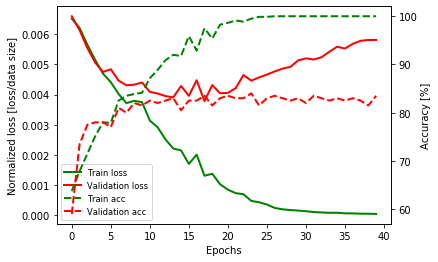


Test Set | Loss: 0.0061 | Accuracy: 81.50%



In [5]:
validate_model(Net,0)

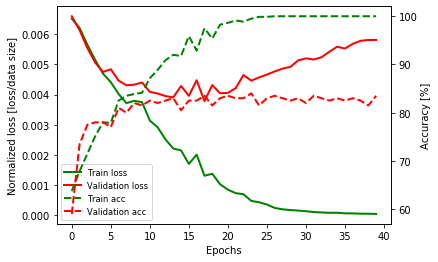


Test Set | Loss: 0.0061 | Accuracy: 81.50%



In [6]:
validate_model(Net,0)

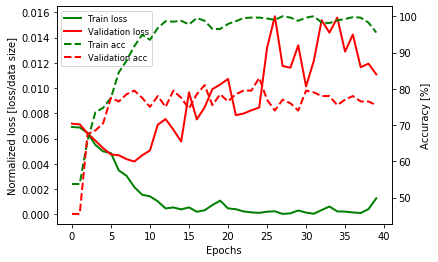

Seed 0 | Test Loss: 0.0130 | Test Accuracy: 74.00%



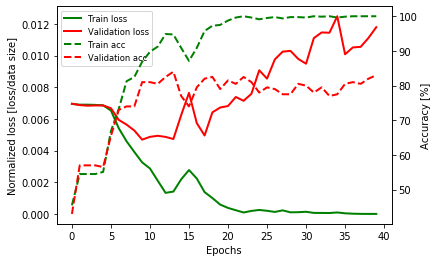

Seed 1 | Test Loss: 0.0162 | Test Accuracy: 77.10%



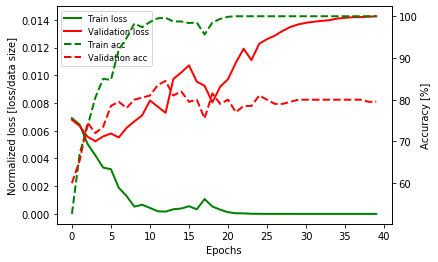

Seed 2 | Test Loss: 0.0159 | Test Accuracy: 79.70%



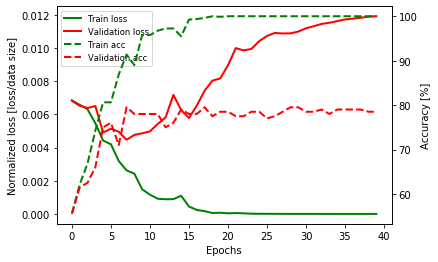

Seed 3 | Test Loss: 0.0114 | Test Accuracy: 82.90%



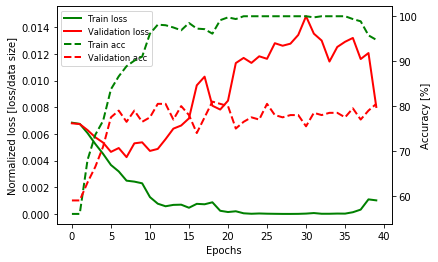

Seed 4 | Test Loss: 0.0098 | Test Accuracy: 78.10%



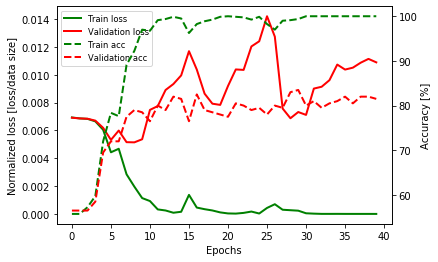

Seed 5 | Test Loss: 0.0140 | Test Accuracy: 80.30%



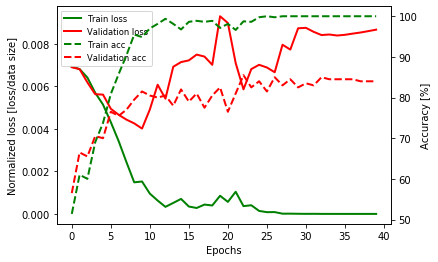

Seed 6 | Test Loss: 0.0182 | Test Accuracy: 77.40%



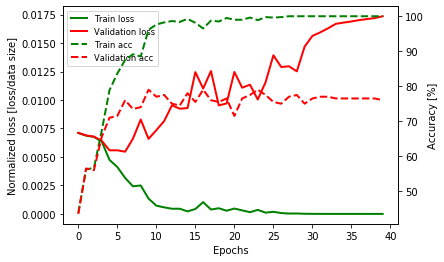

Seed 7 | Test Loss: 0.0161 | Test Accuracy: 78.30%



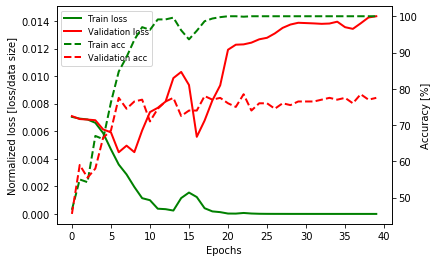

Seed 8 | Test Loss: 0.0159 | Test Accuracy: 78.50%



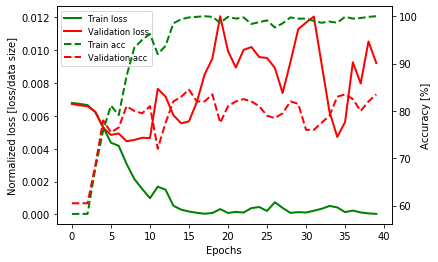

Seed 9 | Test Loss: 0.0135 | Test Accuracy: 80.60%



In [3]:
seeds = [1,2,3,4,5,6,7,8,9,10]
train_results, test_losses, test_accuracies = evaluate_model(Net,seeds)

In [2]:
Nets_default = Nets()

In [3]:
Nets_default.Net2c

{'net_type': 'Net2c',
 'net': models.Basic.Net2C,
 'learning rate': 0.001,
 'hidden_layers': 100,
 'drop_prob': 0.1}

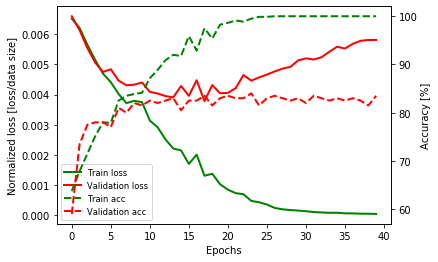


Test Set | Loss: 0.0061 | Accuracy: 81.50%



In [4]:
validate_model(Nets_default.Net2c,0)

In [6]:
Nets_default.Net2c['learning rate'] = 0.2

In [7]:
print(Nets_default.Net2c['learning rate'])

0.2


In [2]:
Nets_default = Nets()

In [ ]:
seeds = [1,2,3,4,5,6,7,8,9,10]
train_results, test_losses, test_accuracies = Nets_default.Tune_Net2c(lrs =[0.1,0.2],drop_prob = [0,0.1],hidden_layers=[100,150],seeds = seeds)

lr : 0.10 , prob : 0.00, nb_hidden : 100 (n= 0)
lr : 0.10 , prob : 0.00, nb_hidden : 100 (n= 1)


In [2]:
Nets_default = Nets()

In [3]:
seeds = [1,2,3,4,5,6,7,8,9,10]
train_results, test_losses, test_accuracies = Nets_default.Tune_LeNet_sharing(lrs =[0.1,0.2],drop_prob_ws = [0,0.1],drop_prob_comp=[0,0.1],seeds = seeds)

NameError: name 'grid_search_ws' is not defined

In [2]:
Nets_default = Nets()

In [3]:
seeds = [1,2,3,4,5,6,7,8,9,10]
train_results, test_losses, test_accuracies = Nets_default.Tune_LeNet_sharing(lrs =[0.1,0.2],drop_prob_ws = [0,0.1],drop_prob_comp=[0,0.1],seeds = seeds)

NameError: name 'drop_prob_aux' is not defined

In [2]:
Nets_default = Nets()

In [3]:
seeds = [1,2,3,4,5,6,7,8,9,10]
train_results, test_losses, test_accuracies = Nets_default.Tune_LeNet_sharing(lrs =[0.1,0.2],drop_prob_ws = [0,0.1],drop_prob_comp=[0,0.1],seeds = seeds)

lr : 0.10 , prob_ws : 0.00, prob_comp : 0 (n= 0)


KeyboardInterrupt: 

In [4]:
seeds = [1,2,3,4,5,6,7,8,9,10]
train_results, test_losses, test_accuracies = Nets_default.Tune_LeNet_sharing_aux(lrs =[0.1,0.2],drop_prob_aux = [0,0.1],drop_prob_comp=[0,0.1],seeds = seeds)

TypeError: Tune_LeNet_sharing_aux() got an unexpected keyword argument 'drop_prob_aux'

In [2]:
Nets_default = Nets()

In [3]:
seeds = [1,2,3,4,5,6,7,8,9,10]
train_results, test_losses, test_accuracies = Nets_default.Tune_LeNet_sharing_aux(lrs =[0.1,0.2],drop_prob_aux = [0,0.1],drop_prob_comp=[0,0.1],seeds = seeds)

 lr : 0.10, prob aux : 0.00, prob comp : 0.00 (n= 0)


KeyboardInterrupt: 

In [2]:
Nets_default = Nets()

In [3]:
seeds = [1,2,3,4,5,6,7,8,9,10]
train_results, test_losses, test_accuracies = Nets_default.Tune_Net2c(lrs =[0.1],drop_prob = [0],hidden_layers=[100,150],seeds = seeds)

lr : 0.1000 , prob : 0.00, nb_hidden : 100 (n= 0)
lr : 0.1000 , prob : 0.00, nb_hidden : 100 (n= 1)
lr : 0.1000 , prob : 0.00, nb_hidden : 100 (n= 2)
lr : 0.1000 , prob : 0.00, nb_hidden : 100 (n= 3)
lr : 0.1000 , prob : 0.00, nb_hidden : 100 (n= 4)
lr : 0.1000 , prob : 0.00, nb_hidden : 100 (n= 5)
lr : 0.1000 , prob : 0.00, nb_hidden : 100 (n= 6)
lr : 0.1000 , prob : 0.00, nb_hidden : 100 (n= 7)
lr : 0.1000 , prob : 0.00, nb_hidden : 100 (n= 8)
lr : 0.1000 , prob : 0.00, nb_hidden : 100 (n= 9)
lr : 0.1000 , prob : 0.00, nb_hidden : 150 (n= 0)
lr : 0.1000 , prob : 0.00, nb_hidden : 150 (n= 1)
lr : 0.1000 , prob : 0.00, nb_hidden : 150 (n= 2)
lr : 0.1000 , prob : 0.00, nb_hidden : 150 (n= 3)
lr : 0.1000 , prob : 0.00, nb_hidden : 150 (n= 4)
lr : 0.1000 , prob : 0.00, nb_hidden : 150 (n= 5)
lr : 0.1000 , prob : 0.00, nb_hidden : 150 (n= 6)
lr : 0.1000 , prob : 0.00, nb_hidden : 150 (n= 7)
lr : 0.1000 , prob : 0.00, nb_hidden : 150 (n= 8)
lr : 0.1000 , prob : 0.00, nb_hidden : 150 (n= 9)
